## Importing Libraries

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing and Tidying the Dataset

In [31]:
#Loading dataset

data = pd.read_csv(r'C:\Users\Natasha\Desktop\respiratory_disease_detection\datasets\Data_Entry_2017_v2020.csv')

#Previewing data
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [32]:
#Dropping unnecessary columns
data.drop(['Image Index', 'Follow-up #', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]'], axis=1, inplace=True)


In [33]:
data.head()

,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,Cardiomegaly,1,57,M,PA
1,Cardiomegaly|Emphysema,1,58,M,PA
2,Cardiomegaly|Effusion,1,58,M,PA
3,No Finding,2,80,M,PA
4,Hernia,3,74,F,PA


In [34]:
#Checking for null values
data.isnull().sum()

Finding Labels    0
Patient ID        0
Patient Age       0
Patient Gender    0
View Position     0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:xlabel='Patient Age'>

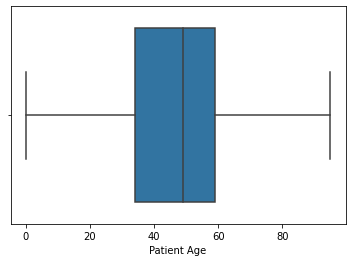

In [35]:
#Checking for Outliers
sns.boxplot(data['Patient Age'])

There are no outliers in our dataset.

In [36]:
# Checking the datatypes within the dataset
data.dtypes

Finding Labels    object
Patient ID         int64
Patient Age        int64
Patient Gender    object
View Position     object
dtype: object

In [37]:
# Re-name the first column

data.rename(columns = {'Finding Labels': 'Respiratory_Disease'}, inplace=True)
data.head()

,Respiratory_Disease,Patient ID,Patient Age,Patient Gender,View Position
0,Cardiomegaly,1,57,M,PA
1,Cardiomegaly|Emphysema,1,58,M,PA
2,Cardiomegaly|Effusion,1,58,M,PA
3,No Finding,2,80,M,PA
4,Hernia,3,74,F,PA


In [38]:
# Checking the shape of the dataset

print('The Dataset contains ',data.shape[0],' rows and ',data.shape[1],' columns.')

The Dataset contains  112120  rows and  5  columns.


In [ ]:
data.to_csv('out.csv')

## Exploratory Data Analysis

### Univariate Analysis

In [39]:
data['Patient Age'].unique()

array([57, 58, 80, 74, 75, 76, 77, 78, 79, 81, 82, 69, 70, 68, 72, 84, 56,
       60, 61, 71, 66, 47, 48, 53, 63, 52, 73, 59, 54, 67, 62, 46, 87, 91,
       92, 55, 64, 65, 44, 49, 51, 50, 83, 33, 42, 86, 45, 24, 31, 89, 90,
       94, 39, 85, 29, 30, 32, 27, 28, 37, 40, 36, 38, 35, 43, 25, 41, 34,
       22, 21, 23, 26, 17, 18, 19, 20, 16, 88, 13, 14, 15, 11, 12,  9, 10,
       93,  8,  7,  6,  5,  4,  3,  2,  1,  0, 95], dtype=int64)

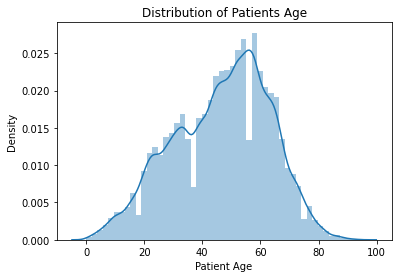

In [40]:
plt.plot()
sns.distplot(data['Patient Age'])
plt.title('Distribution of Patients Age')
plt.show()

The dataset has a normal distribution.

The most affected patients are between ages of 50 and 60.

In [41]:
# Finding out the total number of Males and Females in the Dataset

data['Patient Gender'].value_counts()

M    63340
F    48780
Name: Patient Gender, dtype: int64

There are 63,340 Males and 48,780 Females in the Dataset. Therefore there are more Males who suffer from Respiratory Diseases.

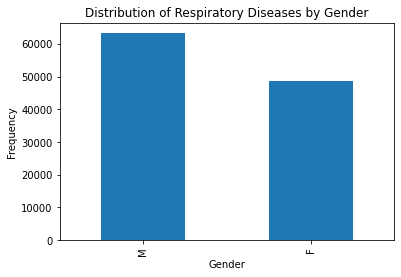

In [42]:
# Plotting a Bar Graph of the Distribution of Genders within the dataset.

data['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Respiratory Diseases by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

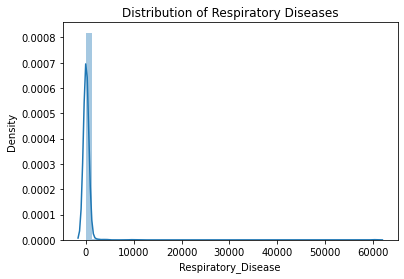

In [43]:

plt.plot()
sns.distplot(data['Respiratory_Disease'].value_counts())
plt.title('Distribution of Respiratory Diseases')
plt.show()

The data is normally distributed.

The data has no correlation between Patients Age and ID.

In [44]:
# Splitting cell data in the Respiratory_Disease column into multiple rows
data = data.drop('Respiratory_Disease', axis=1).join(data['Respiratory_Disease'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('Respiratory_Disease'))
data.head()

,Patient ID,Patient Age,Patient Gender,View Position,Respiratory_Disease
0,1,57,M,PA,Cardiomegaly
1,1,58,M,PA,Cardiomegaly
1,1,58,M,PA,Emphysema
2,1,58,M,PA,Cardiomegaly
2,1,58,M,PA,Effusion


In [45]:
# Checking for unique elements under the Respiratory Disease column
data['Respiratory_Disease'].unique()

array(['Cardiomegaly', 'Emphysema', 'Effusion', 'No Finding', 'Hernia',
       'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax',
       'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema',
       'Consolidation'], dtype=object)

In [46]:
# Check for Duplicates

data.duplicated().any()

True

In [47]:
# Dropping Duplicates
data.drop_duplicates()

,Patient ID,Patient Age,Patient Gender,View Position,Respiratory_Disease
0,1,57,M,PA,Cardiomegaly
1,1,58,M,PA,Cardiomegaly
1,1,58,M,PA,Emphysema
2,1,58,M,PA,Effusion
3,2,80,M,PA,No Finding
...,...,...,...,...,...
112115,30801,38,M,PA,Pneumonia
112116,30802,28,M,PA,No Finding
112117,30803,42,F,PA,No Finding
112118,30804,29,F,PA,No Finding


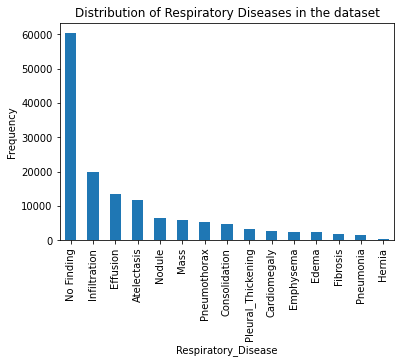

In [48]:
# Plotting a Bar Graph of the Distribution of Respiratory Diseases within the dataset.

data['Respiratory_Disease'].value_counts().plot(kind='bar')
plt.title('Distribution of Respiratory Diseases in the dataset')
plt.xlabel('Respiratory_Disease')
plt.ylabel('Frequency')
plt.show()

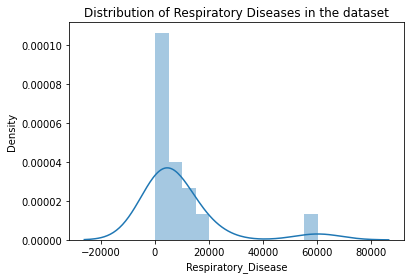

In [49]:
plt.plot()
sns.distplot(data['Respiratory_Disease'].value_counts())
plt.title('Distribution of Respiratory Diseases in the dataset')
plt.show()

### Bivariate Analysis

<AxesSubplot:>

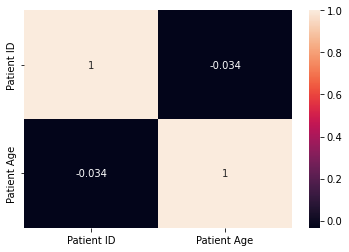

In [50]:
#Checking for correlated columns

sns.heatmap(data.corr(),annot=True)

## Preparing to build the Dash app

In [51]:
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

data.head()

,Patient ID,Patient Age,Patient Gender,View Position,Respiratory_Disease
0,1,57,M,PA,Cardiomegaly
1,1,58,M,PA,Cardiomegaly
1,1,58,M,PA,Emphysema
2,1,58,M,PA,Cardiomegaly
2,1,58,M,PA,Effusion


In [52]:
app = dash.Dash()

## Building the layout of the dashboard

In [53]:
app.layout = html.Div(children=[
    html.H1(children='Respiratory Disease Detection Dashboard'),
    dcc.Dropdown(id='Disease-dropdown',
                 options=[{'label': i, 'value': i}
                          for i in data['Respiratory_Disease'].unique()],
                 value='Cardiomegaly'),
    dcc.Graph(id='Disease-graph')
])

## Adding interactivity to the dashboard

In [54]:
@app.callback(
    Output(component_id='Disease-graph', component_property='figure'),
    Input(component_id='Disease-dropdown', component_property='value')
)
def update_graph(selected_Disease):
    filtered_data = data[data['Respiratory_Disease'] == selected_Disease]
    bar_fig = px.bar(filtered_data,
                       x='Respiratory_Disease', y='Frequency',
                       color='type',
                       title=f'Distribution on {selected_Disease}')
    return bar_fig

## Running the dashboard

In [56]:
%tb

SystemExit: 1

In [59]:
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)
    

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
